In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 14.9MB/s 
     |████████████████████████████████| 194kB 59.1MB/s 
     |████████████████████████████████| 1.2MB 38.9MB/s 
     |████████████████████████████████| 51kB 9.8MB/s 
     |████████████████████████████████| 61kB 10.9MB/s 
Mounted at /content/gdrive


In [2]:
from fastbook import *

# **CLASSIFER AS GIVEN IN WORKBOOK GIVES TRUE FOR CAT**
bulinding a classifier to classify animals(cat)

---



In [3]:
'''
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'
def is_cat(x): return x[0].isupper()
dls=ImageDataLoaders.from_name_func(path, get_image_files(path),valid_pct=0.2,seed=42,label_func=is_cat,item_tfms=Resize(224))
learn=cnn_learner(dls,resnet34,metrics=error_rate)
learn.fine_tune(1)'''
                                    

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.162466,0.031109,0.008796,00:49


epoch,train_loss,valid_loss,error_rate,time
0,0.045459,0.015219,0.004060,00:53


In [4]:
1+1

2

In [40]:
#img=PILImage.create(image_cat())
#img.to_thumb(192)

In [15]:
'''uploader=widgets.FileUpload()
uploader'''

FileUpload(value={}, description='Upload')

In [6]:
uploader=SimpleNamespace(data=['images/chapter1_cat_example.jpg'])


In [11]:
'''
img=PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?:{is_cat}")
print(f"Probability it's a cat: {probs[1].item():.6f}")
'''

Is this a cat?:True
Probability it's a cat: 1.000000


# **CLASSIFIER FOR DOG.**
building a classifier to classify dog images

In [12]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'
def is_dog(x): return x[0].islower()
dls=ImageDataLoaders.from_name_func(path, get_image_files(path),valid_pct=0.2,seed=42,label_func=is_dog,item_tfms=Resize(224))
learn=cnn_learner(dls,resnet34,metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.138352,0.041619,0.010149,00:49


epoch,train_loss,valid_loss,error_rate,time
0,0.043995,0.025102,0.006766,00:54


In [20]:
uploader=widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [21]:
img=PILImage.create(uploader.data[0])
is_dog,_,probs = learn.predict(img)
print(f"Is this a dog?:{is_dog}")
print(f"Probability it's a dog: {probs[1].item():.6f}")

Is this a dog?:True
Probability it's a dog: 0.999979


# **Image Segmentation: when a model can recognize the contentg of every  individual pixel in an image **
Using a subset of Camvid dataset

In [28]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn=unet_learner(dls,resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,2.817199,2.160839,00:01


epoch,train_loss,valid_loss,time
0,1.657166,1.547384,00:01
1,1.473997,1.326191,00:01
2,1.347431,1.077048,00:01
3,1.210202,1.125471,00:01
4,1.088829,0.848437,00:01
5,0.984791,0.804588,00:01
6,0.897919,0.801608,00:01
7,0.831889,0.799328,00:01


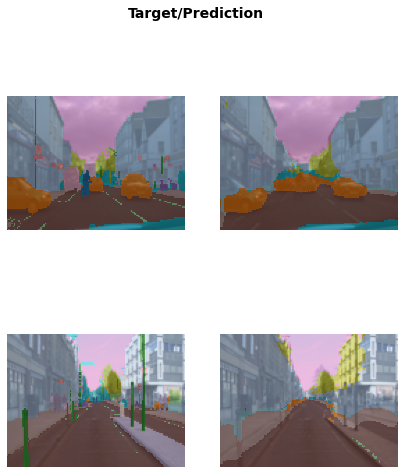

In [29]:
learn.show_results(max_n=6, figsize=(7,8))

In [30]:
from fastai.text.all import *
dls=TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn=text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4,1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.473953,0.411540,0.815920,03:32


epoch,train_loss,valid_loss,accuracy,time
0,0.312480,0.247409,0.903520,07:12
1,0.253503,0.204104,0.921440,07:13
2,0.190138,0.192368,0.927680,07:13
3,0.141192,0.187788,0.930960,07:13


In [31]:
learn.predict("I really liked  that movie")

('pos', tensor(1), tensor([3.6164e-04, 9.9964e-01]))

In [36]:
from fastai.tabular.all import *
path=untar_data(URLs.ADULT_SAMPLE)
dls=TabularDataLoaders.from_csv(path/'adult.csv',path=path,y_names="salary",
  cat_names=['workclass','education','marital-status','occupation',
             'relationship','race'],
  cont_names = ['age','fnlwgt','education-num'],
  procs = [Categorify, FillMissing, Normalize])
learn=tabular_learner(dls,metrics=accuracy)

In [37]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.369196,0.351058,0.837070,00:05
1,0.358851,0.339866,0.842752,00:05
2,0.336974,0.336988,0.845209,00:05


In [38]:
from fastai.collab import *
path=untar_data(URLs.ML_SAMPLE)
dls=CollabDataLoaders.from_csv(path/'ratings.csv')
learn=collab_learner(dls,y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.512560,1.421625,00:00


epoch,train_loss,valid_loss,time
0,1.362148,1.365980,00:00
1,1.268734,1.195758,00:00
2,1.027676,0.900378,00:00
3,0.798411,0.756086,00:00
4,0.688800,0.721001,00:00
5,0.644064,0.709574,00:00
6,0.606468,0.704381,00:00
7,0.608632,0.702220,00:00
8,0.594725,0.701228,00:00
9,0.585440,0.701099,00:00


In [39]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,8.0,44.0,1.5,3.317125
1,65.0,37.0,3.0,3.646653
2,80.0,59.0,3.0,3.776417
3,62.0,96.0,4.0,3.800126
4,1.0,19.0,2.0,2.607883
5,2.0,6.0,5.0,4.118717
6,92.0,52.0,4.0,4.068373
7,83.0,40.0,3.0,3.351223
8,68.0,5.0,4.0,3.598091
